# Usiminas: Residência em Ciência de Dados

**Disciplina:** Probabilidade e Análise de Dados com Python

**Professores:** Flávio Figueiredo e Pedro Melo

**Aula 9:** Estudo de caso ENEM

# CADERNO DE EXERCÍCIOS - AULA 09

Utilizando as técnicas aprendidas até agora, analise os microdados do ENEM 2020 para responder às perguntas a seguir. Caso seja possível, gere visualizações apropriadas para cada uma delas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
# Carregando o dataframe
# Encoding cp860 é o encoding para português. utf-8 não lê estes dados.
enem = pd.read_csv('http://dcc.ufmg.br/~flaviovdf/MICRODADOS_ENEM_2020_FILTRADOS.csv')

## 1. Quais os 5 estados brasileiros com maior taxa de ausência (geral) no ENEM 2020?


In [ ]:
enem.head()

,NU_INSCRICAO,SG_UF_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_ANO_CONCLUIU,NU_NOTA_REDACAO,NU_NOTA_CN,TP_FAIXA_ETARIA,Q005,Q006,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,TP_ESCOLA
0,200006271946,NaN,0,0,0,0,11,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,1
1,200001195856,NaN,1,1,1,1,11,580.0,604.1,11,NaN,NaN,711.3,661.7,595.3,1
2,200001943954,BA,0,0,0,0,0,NaN,NaN,4,3.0,B,NaN,NaN,NaN,2
3,200001908998,SP,1,1,1,1,0,760.0,620.8,2,NaN,NaN,759.4,675.0,624.2,2
4,200001634757,NaN,0,0,0,0,1,NaN,NaN,4,3.0,B,NaN,NaN,NaN,1


SG_UF_ESC
RN    0.753158
DF    0.733644
PI    0.704028
PB    0.701290
AC    0.696896
Name: Taxa_Ausencia, dtype: float64


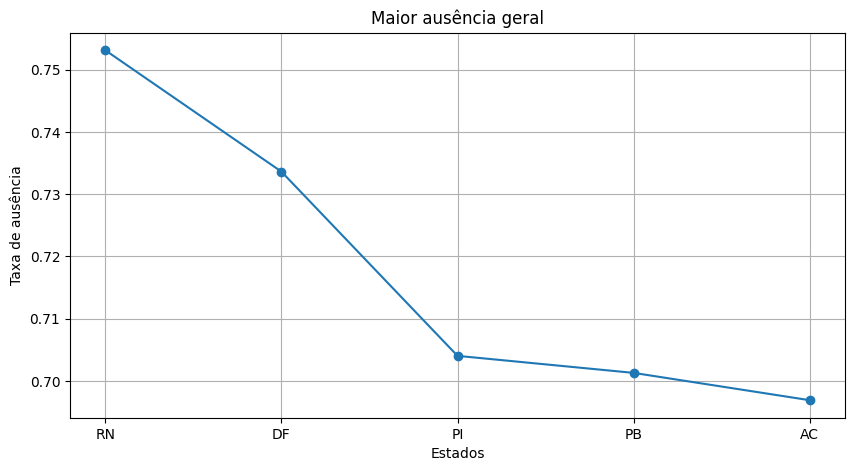

In [ ]:
df = enem.copy()
df['Taxa_Ausencia'] = df[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']].mean(axis=1)

media_ausencia_por_estado = df.groupby('SG_UF_ESC')['Taxa_Ausencia'].mean()

estados_maior_ausencia = media_ausencia_por_estado.sort_values(ascending=False).head(5)

print(estados_maior_ausencia)

plt.figure(figsize=(10, 5))
plt.plot(estados_maior_ausencia, marker='o')
plt.xlabel("Estados")
plt.ylabel("Taxa de ausência")
plt.title("Maior ausência geral")
plt.grid(True)
plt.show()

## 2. Como a probabilidade de um(a) candidato(a) obter nota superior a 600 na redação varia com o tempo desde que ele(a) concluiu o segundo grau? Esta tendência é a mesma observada em Ciências da natureza?

**Ovservação:** O valor da coluna TP_ANO_CONCLUIU já indica o tempo desde a conclusão até prova. Entretanto, o valor 0 não necessariamente indica que o estudante concluiu em 2020! Elimine este valor para análises mais precisas.

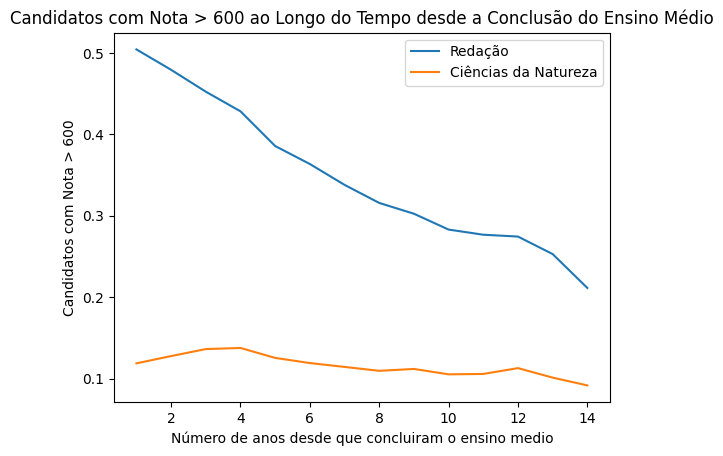

In [ ]:
df = enem[enem['TP_ANO_CONCLUIU'] != 0]

df_presente_redacao = df[df['TP_PRESENCA_LC'] == 1]
df_presente_cn = df[df['TP_PRESENCA_CN'] == 1]

redacao_prob = df_presente_redacao[df_presente_redacao['NU_NOTA_REDACAO'] > 600].groupby('TP_ANO_CONCLUIU').size() / df_presente_redacao.groupby('TP_ANO_CONCLUIU').size()

cn_prob = df_presente_cn[df_presente_cn['NU_NOTA_CN'] > 600].groupby('TP_ANO_CONCLUIU').size() / df_presente_cn.groupby('TP_ANO_CONCLUIU').size()

plt.plot(redacao_prob.index, redacao_prob, label='Redação')
plt.plot(cn_prob.index, cn_prob, label='Ciências da Natureza')
plt.xlabel('Número de anos desde que concluiram o ensino medio')
plt.ylabel('Candidatos com Nota > 600')
plt.title('Candidatos com Nota > 600 ao Longo do Tempo desde a Conclusão do Ensino Médio')
plt.legend()
plt.show()

## 3. Como fatores como renda (Q006), número de pessoas que moram na mesma residência que o candidato (Q005), e a faixa etária (TP_FAIXA_ETARIA) do participante influenciam em sua nota em Matemática?

**Sugestões:** Para análises mais precisas, elimine as notas 0 e os candidatos que faltaram nas provas analisadas (ex:TP_PRESENCA_MT=0). Como as notas são uma escala contínua, você pode optar, se preferir, por torná-la discreta, criando classes que englobem faixas de notas (ex: 200<NU_NOTA_MT<400).

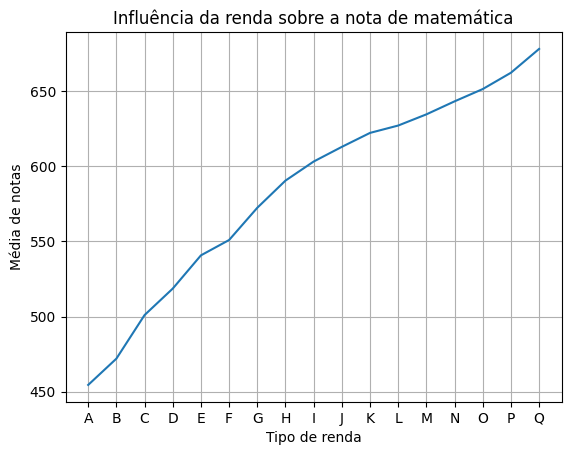

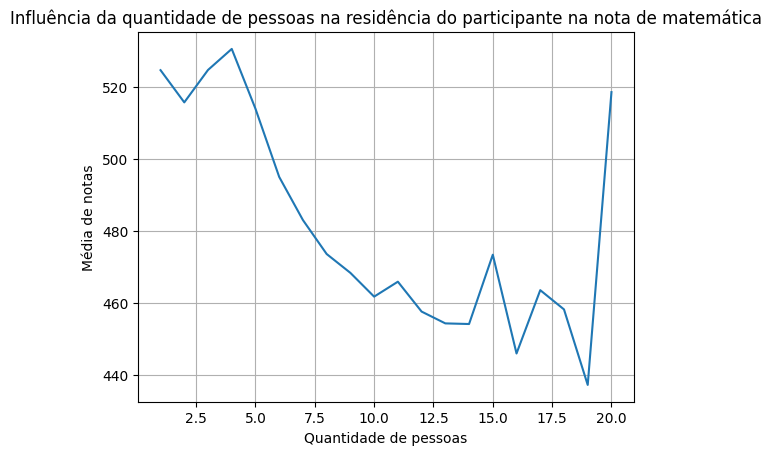

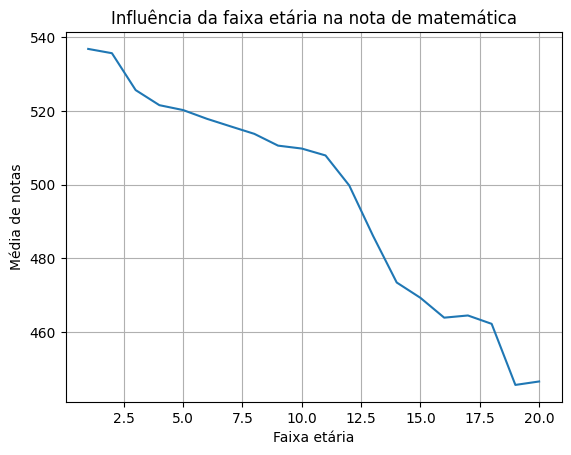

In [58]:
df = enem[(enem['NU_NOTA_MT'] != 0) & (enem['TP_PRESENCA_MT'] == 1)]

df = df[['Q006', 'Q005', 'TP_FAIXA_ETARIA', 'NU_NOTA_MT']].dropna()

df_renda = df[['Q006', 'NU_NOTA_MT']].groupby('Q006').mean()

df_qtd_residencia = df[['Q005', 'NU_NOTA_MT']].groupby('Q005').mean()

df_faixa_etaria = df[['TP_FAIXA_ETARIA', 'NU_NOTA_MT']].groupby('TP_FAIXA_ETARIA').mean()


plt.plot(df_renda)
plt.xlabel("Tipo de renda")
plt.ylabel("Média de notas")
plt.title("Influência da renda sobre a nota de matemática")
plt.grid(True)
plt.show()
print(' ')

plt.plot(df_qtd_residencia)
plt.xlabel("Quantidade de pessoas")
plt.ylabel("Média de notas")
plt.title("Influência da quantidade de pessoas na residência do participante na nota de matemática")
plt.grid(True)
plt.show()
print(' ')


plt.plot(df_faixa_etaria)
plt.xlabel("Faixa etária")
plt.ylabel("Média de notas")
plt.title("Influência da faixa etária na nota de matemática")
plt.grid(True)
plt.show()